(53, 61, 33)


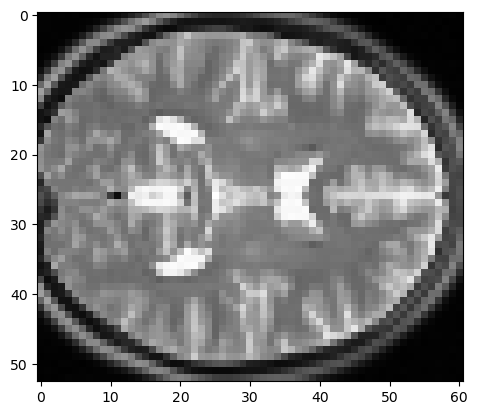

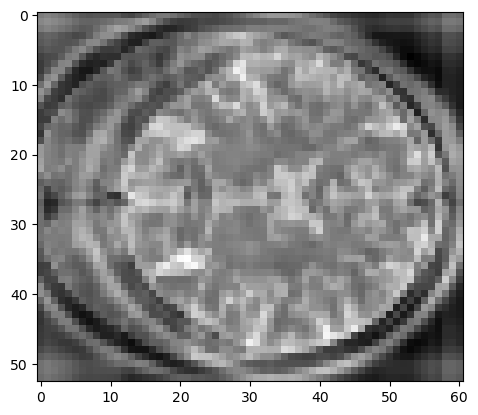

In [18]:
# importing a 3D brain MRI image

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = nib.load('/Users/christophermarouani/Desktop/code_msk/MRI_msk/someones_epi.nii')
data = img.get_fdata()
print(data.shape)

# Display the image
plt.imshow(data[:, :, 10], cmap='gray')
plt.show()


# do the fourier transform of the image
fourier = np.fft.fftn(data).real

# do the denoising with a split belgram total variation algorithm form scikit-image

from skimage.restoration import denoise_tv_bregman

denoised = denoise_tv_bregman(fourier, 0.1)

# do the inver fourier transform and plot the image

denoised_fourier = np.fft.ifftn(denoised).real

plt.imshow(denoised_fourier[:, :, 10], cmap='gray')
plt.show()
